# Applied Machine Learning: Unsupervised Learning

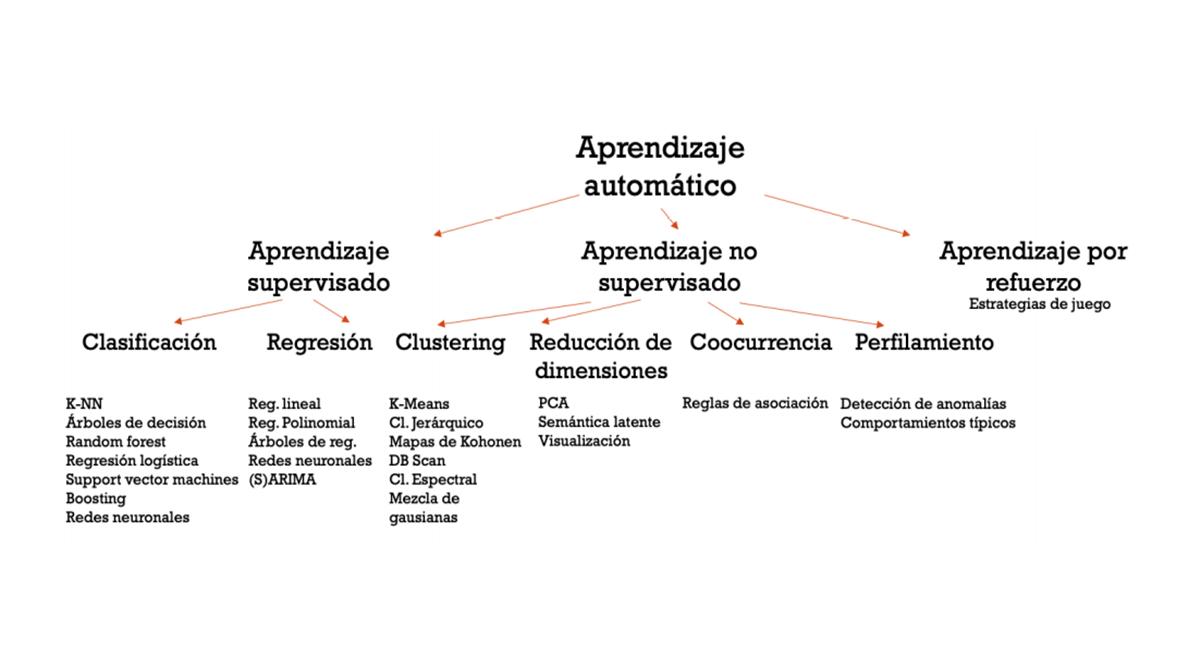

## Preamble and Datasets

In [2]:
%matplotlib notebook
get_ipython().magic('matplotlib notebook')
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
# Our sample fruits dataseta
fruits = pd.read_csv('frutas_pro.csv')
X = fruits[['mass','width','height', 'color_score']]
y = fruits[['fruit_label']] 

In [3]:
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score,volumen
0,1,apple,granny_smith,192,8.4,7.3,0.55,3.913894
1,1,apple,granny_smith,180,8.0,6.8,0.59,4.136029
2,1,apple,granny_smith,176,7.4,7.2,0.60,4.129129
3,2,mandarin,mandarin,86,6.2,4.7,0.80,3.689087
4,2,mandarin,mandarin,86,6.2,4.7,0.80,3.689087
5,2,mandarin,mandarin,86,6.2,4.7,0.80,3.689087
6,2,mandarin,mandarin,84,6.0,4.6,0.79,3.804348
7,2,mandarin,mandarin,84,6.0,4.6,0.79,3.804348
8,2,mandarin,mandarin,84,6.0,4.6,0.79,3.804348
9,2,mandarin,mandarin,80,5.8,4.3,0.77,4.009623


In [4]:
fruits["fruit_name"].value_counts()

apple       95
orange      95
lemon       80
mandarin    70
Name: fruit_name, dtype: int64

In [5]:
fruits["fruit_label"].value_counts()

1    95
3    95
4    80
2    70
Name: fruit_label, dtype: int64

In [6]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    340 non-null    int64  
 1   fruit_name     340 non-null    object 
 2   fruit_subtype  340 non-null    object 
 3   mass           340 non-null    int64  
 4   width          340 non-null    float64
 5   height         340 non-null    float64
 6   color_score    340 non-null    float64
 7   volumen        340 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 21.4+ KB


##  Mezclar del conjunto de datos

In [7]:
fruits = fruits.sample(frac=1).reset_index(drop=True)
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score,volumen
0,1,apple,cripps_pink,156,7.4,7.4,0.84,3.560993
1,3,orange,selected_seconds,158,7.1,7.5,0.79,3.708920
2,1,apple,braeburn,172,7.1,7.6,0.92,3.984433
3,3,orange,spanish_jumbo,342,9.0,9.4,0.75,5.053191
4,2,mandarin,mandarin,76,5.8,4.0,0.81,4.094828
5,4,lemon,spanish_belsan,174,7.3,10.1,0.72,2.949953
6,3,orange,turkey_navel,154,7.3,7.3,0.79,3.612310
7,4,lemon,unknown,116,6.0,7.5,0.72,3.222222
8,4,lemon,spanish_belsan,186,7.2,9.2,0.72,3.509964
9,4,lemon,spanish_belsan,200,7.3,10.5,0.72,3.261579


## Dimensionality Reduction and Manifold Learning
## Determinar el No. de Clusters- elbow curve

<IPython.core.display.Javascript object>


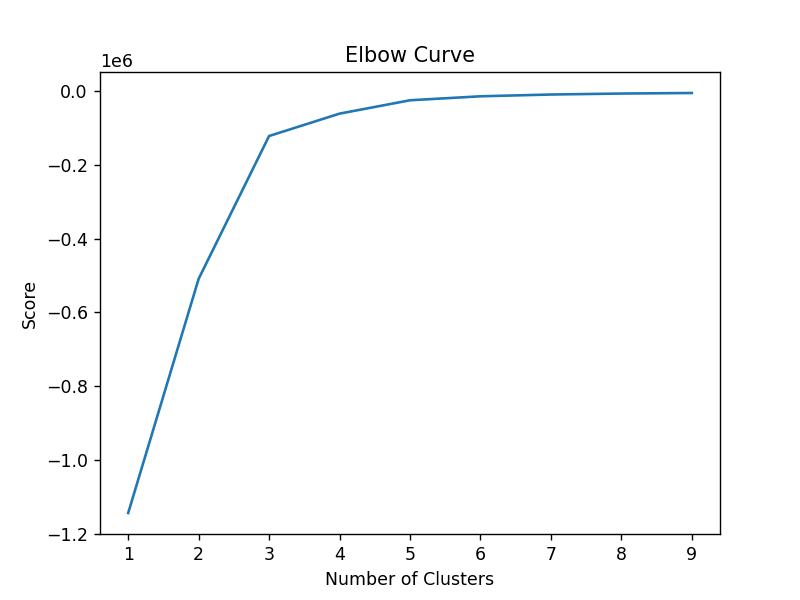

In [8]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

<IPython.core.display.Javascript object>


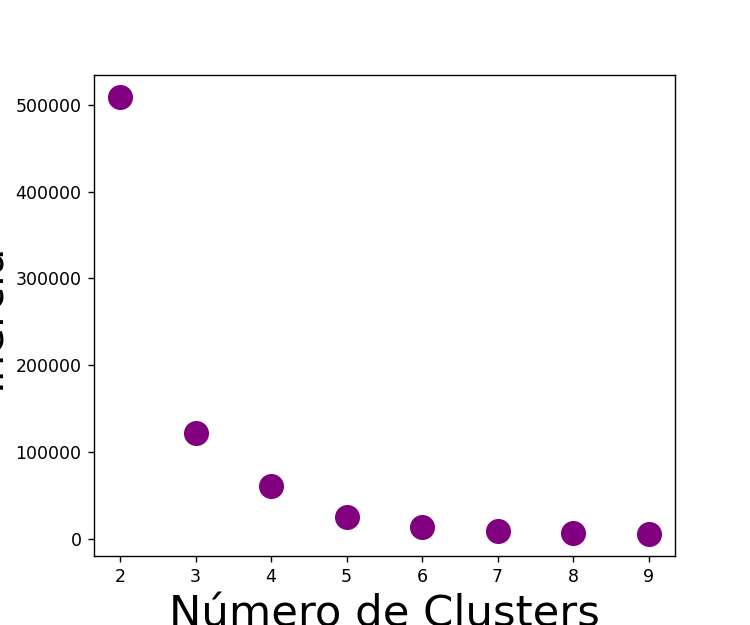

In [9]:
'''Modelo #2 Mej.del Cálculo del número de Clusters (K)'Curva de Elbown')'''

inercias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(X)    
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inercias, marker="o", s=180, color="purple")
plt.xlabel("Número de Clusters", fontsize=25)
plt.ylabel("Inercia", fontsize=25)
plt.show()

### Principal Components Analysis (PCA)
Antes de aplicar el PCA, cada característica debe estar centrada (media cero) y con varianza unitaria

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_labelled_scatter

#Perticion e a
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X).transform(X)  

pca = PCA(n_components = 4).fit(X_normalized)
X_pca = pca.transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y, ['cluster1','cluester2','cluster3', 'cluster4'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Frutas Dataset PCA (n_components = 4)');


<IPython.core.display.Javascript object>

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not      fruit_label
0              1
1              1
2              1
3              2
4              2
..           ...
335            4
336            4
337            4
338            4
339            4

[340 rows x 1 columns]

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_labelled_scatter

# Our sample fruits dataset
fruits = pd.read_table('frutas_pro.csv')

#X = fruits[['height', 'width', 'mass', 'color_score']]
#y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X).transform(X)  

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

In [23]:
from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y, ['clus1','clus2'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Frutas Dataset PCA (n_components = 3)');

<IPython.core.display.Javascript object>

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not      fruit_label
0              1
1              1
2              1
3              2
4              2
..           ...
335            4
336            4
337            4
338            4
339            4

[340 rows x 1 columns]

## Dimensionality Reduction and Manifold Learning

### Principal Components Analysis (PCA)

#### Using PCA to find the first two principal components of the breast cancer dataset

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X_cancer.shape, X_pca.shape)

(569, 30) (569, 2)


In [18]:
X_normalized

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

#### Plotting the PCA-transformed version of the breast cancer dataset

<IPython.core.display.Javascript object>


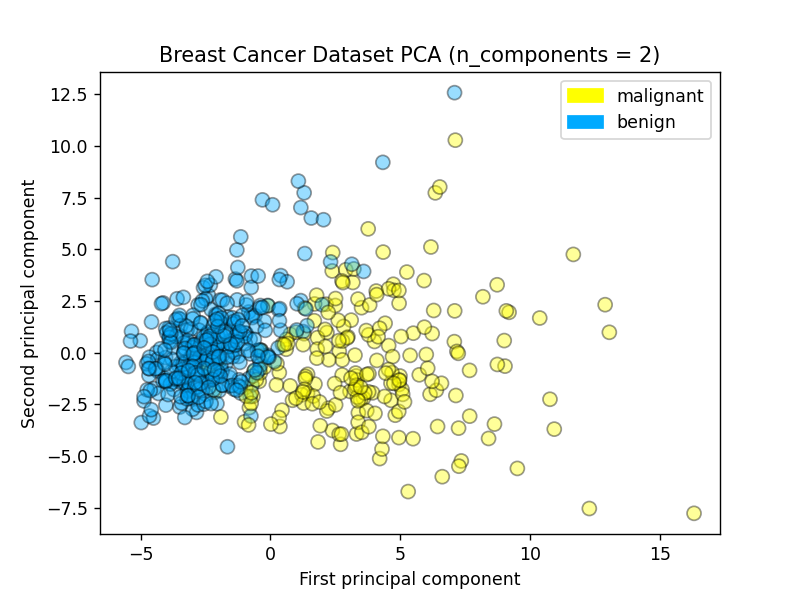

In [19]:
from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)');

### Manifold learning methods

#### Multidimensional scaling (MDS) on the fruit dataset

<IPython.core.display.Javascript object>


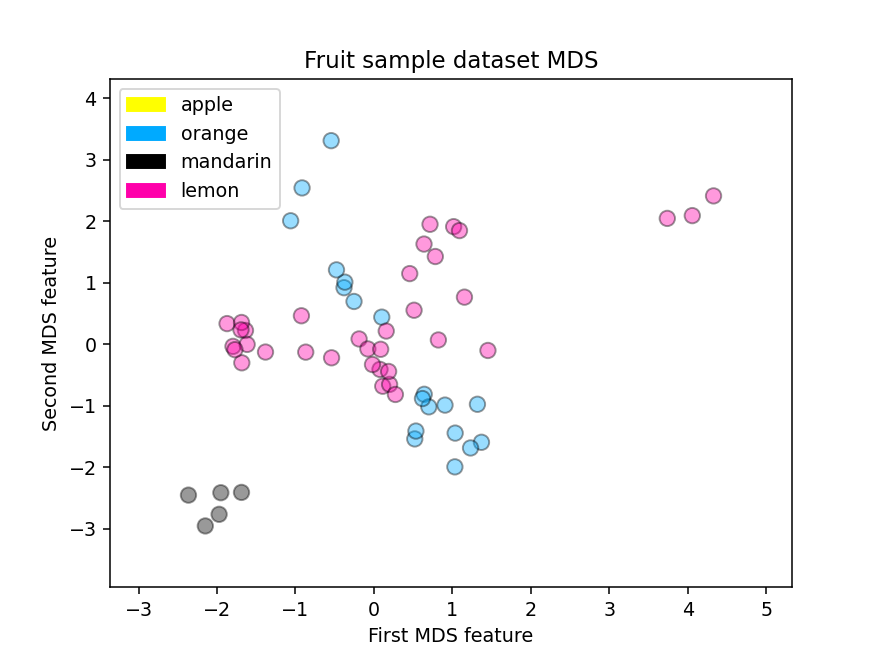

In [19]:
#escalado multidimensional
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import MDS

# cada característica debe estar centrada (media cero) y con varianza unitaria
X_fruits_normalized = StandardScaler().fit(X).transform(X)  
#X_fruits_normalized = MinMaxScaler().fit(X).transform(X)

mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(X_fruits_normalized)

#plot_labelled_scatter(X_fruits_normalized, y, 
#                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

plot_labelled_scatter(X_fruits_mds, y, ['apple','orange','mandarin','lemon'])
plt.xlabel('First MDS feature')
plt.ylabel('Second MDS feature')
plt.title('Fruit sample dataset MDS');

In [ ]:
fruits['fruit_name'].value_counts()

#### Multidimensional scaling (MDS) on the breast cancer dataset

(This example is not covered in the lecture video, but is included here so you can compare it to the results from PCA.)

<IPython.core.display.Javascript object>


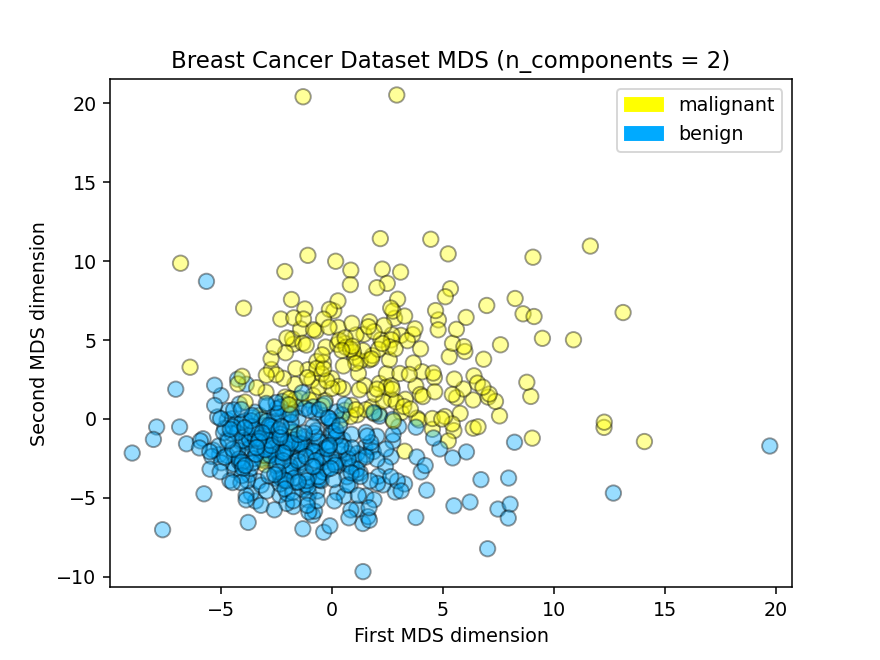

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'])

plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

#### t-SNE on the fruit dataset

(This example from the lecture video is included so that you can see how some dimensionality reduction methods may be less successful on some datasets. Here, it doesn't work as well at finding structure in the small fruits dataset, compared to other methods like MDS.)

<IPython.core.display.Javascript object>


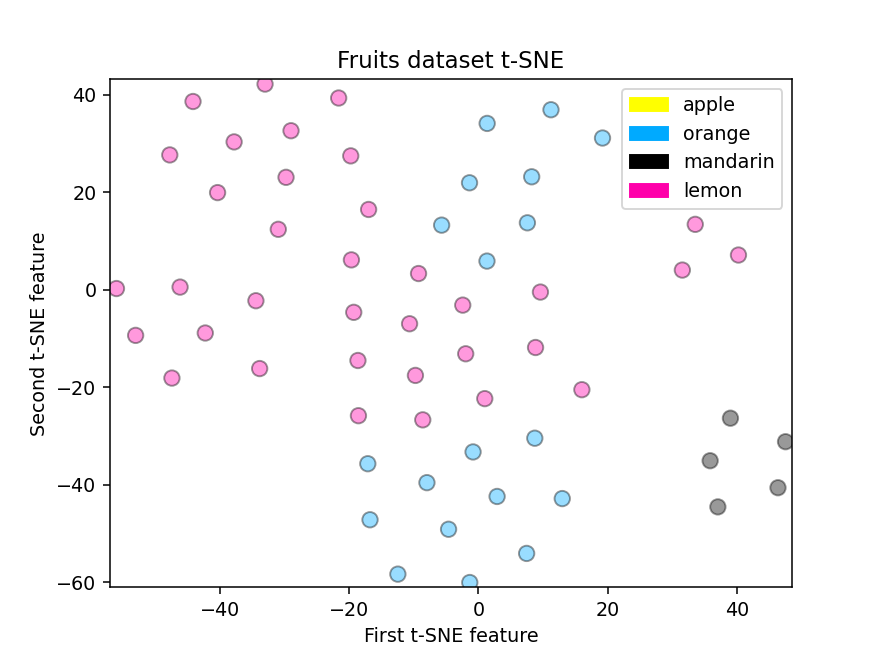

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_tsne, y, 
    ['apple','orange','mandarin','lemon'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Fruits dataset t-SNE');

#### t-SNE on the breast cancer dataset

Although not shown in the lecture video, this example is included for comparison, showing the results of running t-SNE on the breast cancer dataset.  See the reading "How to Use t-SNE effectively" for further details on how the visualizations from t-SNE are affected by specific parameter settings.

<IPython.core.display.Javascript object>


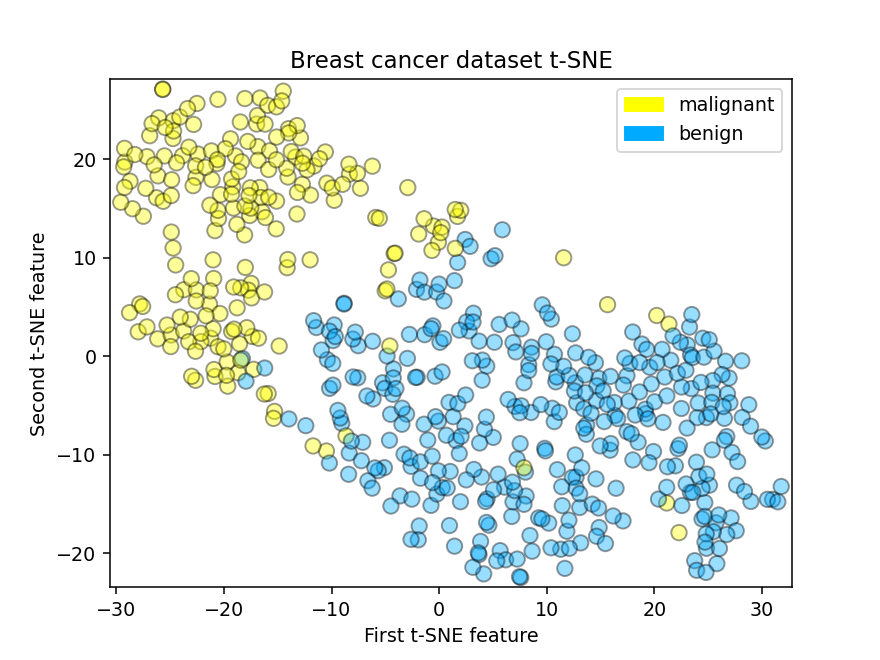

In [23]:
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, 
    ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE');

## Clustering

### K-means

This example from the lecture video creates an artificial dataset with make_blobs, then applies k-means to find 3 clusters, and plots the points in each cluster identified by a corresponding color.

<IPython.core.display.Javascript object>


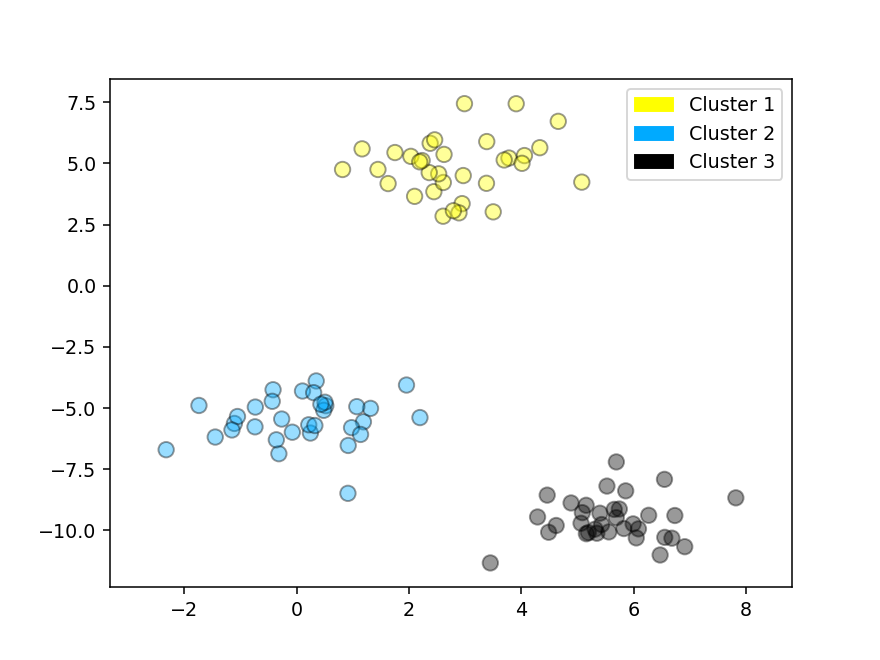

In [24]:
#Modelo de pruebas
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])


In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

Example showing k-means used to find 4 clusters in the fruits dataset.  Note that in general, it's important to scale the individual features before applying k-means clustering.

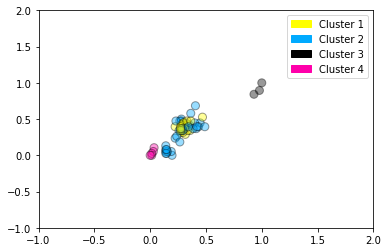

In [3]:
# Execelnete Ejercio de K-Means

import pandas as pd
#from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

##  Cargar Dataset
fruits = pd.read_table('fruit_data_with_colors.txt')

## Definir cual es la columna de salida
X = fruits[['mass','width','height', 'color_score']]
y = fruits[['fruit_label']] 

## Division del dataset en datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)


## Escalado y Normalización de los datos
# cada característica debe estar centrada (media cero) y con varianza unitaria
X_fruits_normalized = MinMaxScaler().fit(X).transform(X)  

## Kmeans con un conjunto de datos multidimensional*
kmeans = KMeans(n_clusters = 4, random_state = 40)

#Enetrenamiento del  Modelo
kmeans.fit(X_fruits_normalized)

## Mostrar los culsters
plot_labelled_scatter(X_fruits_normalized, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

In [4]:
kmeans.labels_

array([1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
kmeans.cluster_centers_

array([[0.30953257, 0.39196676, 0.52712551, 0.77839335],
       [0.28409091, 0.30921053, 0.64951923, 0.42105263],
       [0.96969697, 0.9122807 , 0.81025641, 0.51754386],
       [0.01818182, 0.03684211, 0.05846154, 0.64736842]])

In [6]:
#Predicciones y es mu parceido a resualtdos de kmeans.labels_
y_pred = kmeans.fit_predict(X_fruits_normalized)

In [7]:
y_pred

array([1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Metricas de los no supervisados de KMeans

In [10]:
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans

import warnings
warnings.filterwarnings("ignore")

In [11]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [12]:
def build_model(clustering_model, data, labels):
    
    model = clustering_model(data)

    print('homo\tcompl\tv-meas\tARI\tAMI')
    print(50 * '-')
    
    print('%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          %(metrics.homogeneity_score(labels, model.labels_),
            metrics.completeness_score(labels, model.labels_),
            metrics.v_measure_score(labels, model.labels_),
            metrics.adjusted_rand_score(labels, model.labels_),
            metrics.adjusted_mutual_info_score(labels,  model.labels_)))
            #metrics.silhouette_score(data, model.labels_)))

## Kmeans

In [13]:
def k_means(X_fruits_normalized, n_clusters=3, max_iter=1000):
    model = KMeans(n_clusters=4, max_iter=1000).fit(X_fruits_normalized)
    return model

In [14]:
# Calculamos el purity score, es importante darse cuenta de que recibe las etiquetas
# no es bueno para evaluarv data desequilbrada hay muchos datos puros.Una sola pasada.
print("Purity Score:", purity_score(y, y_pred))

NameError: name 'np' is not defined

In [35]:
build_model(k_means, y, y_pred)

homo	compl	v-meas	ARI	AMI
--------------------------------------------------
0.482	0.394	0.434	0.217	0.388


In [36]:
#otro ejercicio de silhouette
metrics.silhouette_score(X_fruits_normalized, y_pred)

0.39421171753100476

# Otras metricas por separado para comparar

In [37]:
# Calculamos el purity score, es importante darse cuenta de que recibe las etiquetas
# no es bueno para evaluarv data desequilbrada hay muchos datos puros.Una sola pasada.
print("Purity Score : %0.3f" % purity_score(y, y_pred))

Purity Score : 0.593


In [38]:
# Calculamos el Calinski harabasz score, es importante darse cuenta de que no le pasamos las etiquetas
#Bueno para conparar entre algortimos y es de 913 (Una sola pasada).
##sklearn.metrics.calinski_harabasz_score(X, labels)
print("Calinski harabasz: %0.3f" % metrics.calinski_harabasz_score(X_fruits_normalized, y_pred))

Calinski harabasz: 37.795


In [39]:
from sklearn.metrics import davies_bouldin_score
# Calculamos el davies_bouldin_score xxxxx
print("davies_bouldin_score: %0.3f" % davies_bouldin_score(X_fruits_normalized, y_pred))

davies_bouldin_score: 0.741


In [40]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_fruits_normalized, y_pred))

Silhouette Coefficient: 0.394


## Agglomerative

### Agglomerative clustering de Frutas

<IPython.core.display.Javascript object>


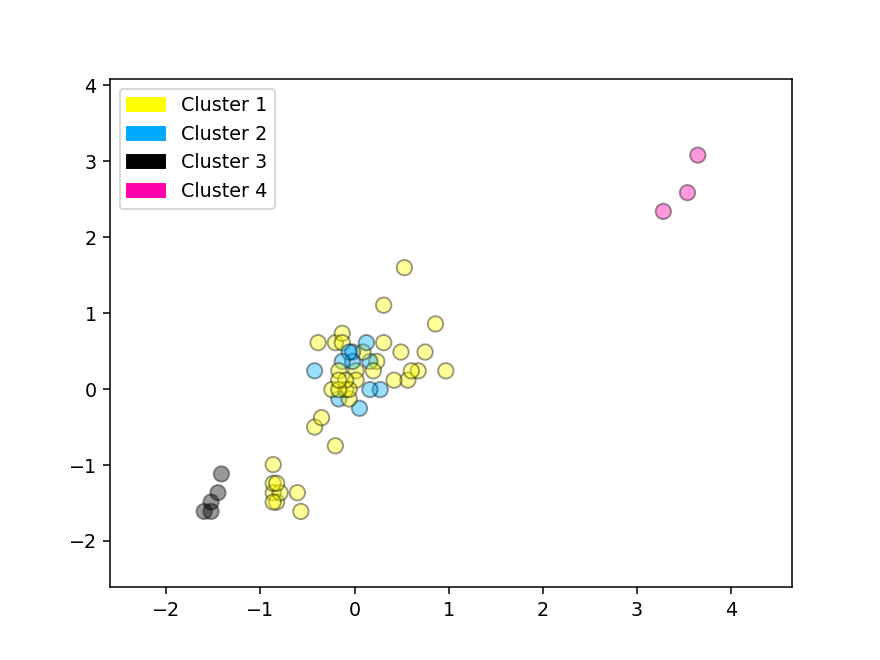

In [41]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

fruits = pd.read_table('fruit_data_with_colors.txt')
X_fru = fruits[['mass','width','height', 'color_score']]
y_fru = fruits[['fruit_label']] 

# cada característica debe estar centrada (media cero) y con varianza unitaria
X_fruits_normalized = StandardScaler().fit(X_fru).transform(X_fru) 

cls = AgglomerativeClustering(n_clusters = 4)
cls_assignment = cls.fit_predict(X_fruits_normalized)

plot_labelled_scatter(X_fruits_normalized, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

#### Creating a dendrogram (using scipy)

<IPython.core.display.Javascript object>


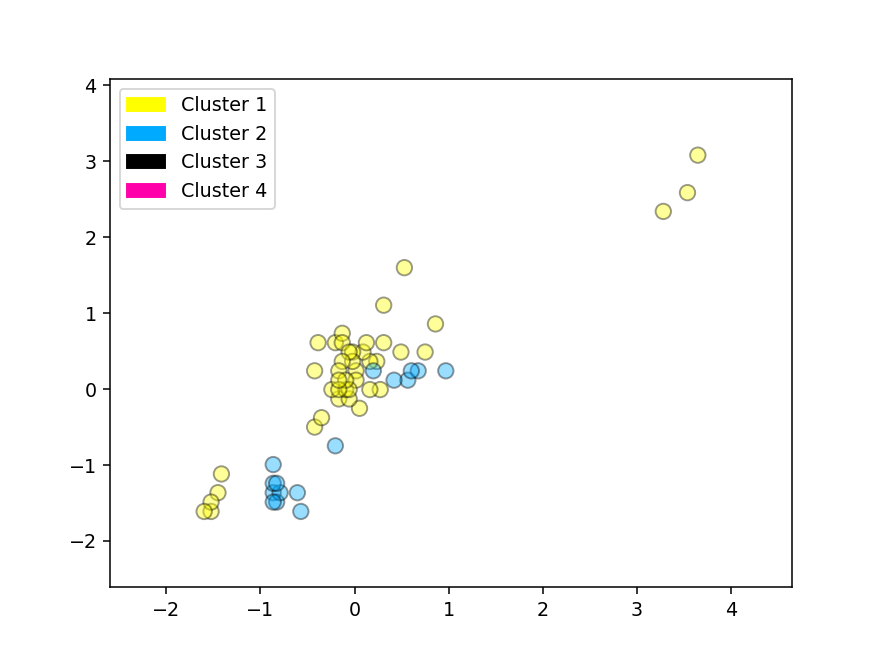

[[ 0.52944179  1.59869024 -0.29139659 -2.79359541]
 [ 0.30946246  1.10485399 -0.66192242 -2.26868417]
 [ 0.23613601  0.36409961 -0.36550175 -2.13745636]
 [-1.41370901 -1.11740915 -2.21813091  0.48709984]
 [-1.45037224 -1.36432727 -2.29223608  0.35587203]
 [-1.52369868 -1.6112454  -2.51455158  0.09341641]
 [-1.52369868 -1.48778634 -2.51455158  0.61832765]
 [-1.59702513 -1.6112454  -2.73686708  0.61832765]
 [ 0.27279923 -0.00627758  0.07912925  2.06183356]
 [ 0.16280957  0.36409961 -0.51371209  1.66815013]
 [ 0.0528199  -0.25319571 -0.29139659  2.19306137]
 [ 0.16280957 -0.00627758 -0.06908109  2.06183356]
 [-0.16715944 -0.12973664 -0.43960692  1.53692232]
 [ 0.01615667  0.24064055  0.00502408 -0.82517826]
 [-0.20382266  0.61101774 -0.29139659 -0.95640607]
 [-0.13049622  0.7344768  -0.43960692 -0.95640607]
 [-0.13049622  0.61101774 -0.14318625 -1.21886169]
 [ 0.08948312  0.48755867 -0.06908109 -0.43149483]
 [-0.02050655  0.48755867 -0.43960692  0.88078327]
 [-0.02050655  0.36409961 -0.36

In [42]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

fruits = pd.read_table('fruit_data_with_colors.txt')
X_fru = fruits[['mass','width','height', 'color_score']]
y_fru = fruits[['fruit_label']] 

# cada característica debe estar centrada (media cero) y con varianza unitaria
X_fruits_normalized = StandardScaler().fit(X_fru).transform(X_fru)
y_fru_normal = StandardScaler().fit(y_fru).transform(y_fru)

plot_labelled_scatter(X_fruits_normalized, y_fru_normal, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

print(X_fruits_normalized)

<IPython.core.display.Javascript object>


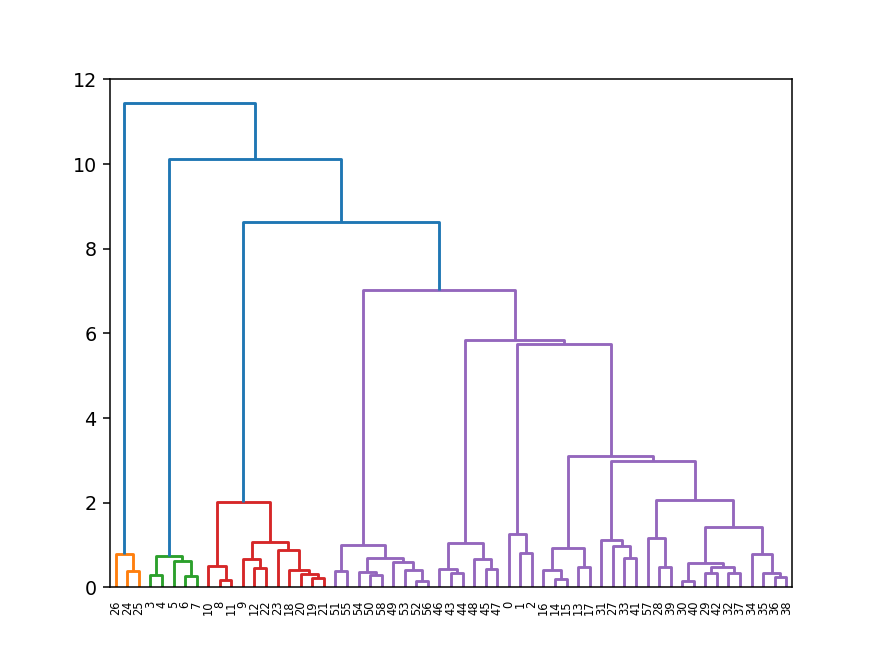

In [43]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X_fruits_normalized))
plt.show()

In [ ]:
build_model(agglomerative_fn,y, y_pred)

### Agglomerative clustering_Jugete

In [44]:
def agglomerative_fn(X_fruits_normalized, n_clusters=3):
    model = AgglomerativeClustering(n_clusters = n_clusters).fit(X_fruits_normalized)
    
    return model

<IPython.core.display.Javascript object>


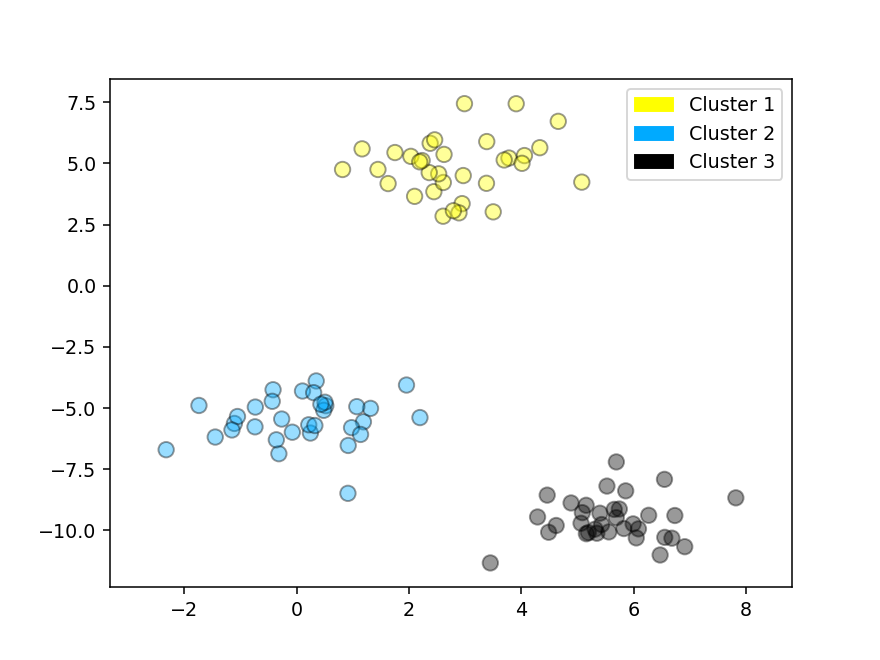

In [45]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])

#### Creating a dendrogram (using scipy)

This dendrogram plot is based on the dataset created in the previous step with make_blobs, but for clarity, only 10 samples have been selected for this example, as plotted here:

<IPython.core.display.Javascript object>


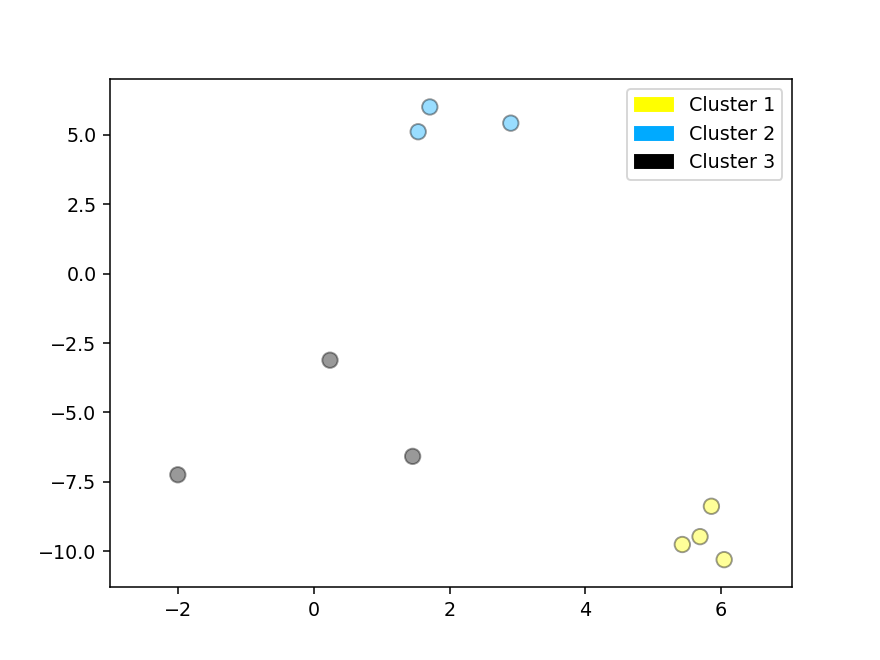

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [46]:
X, y = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X, y, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X)

And here's the dendrogram corresponding to agglomerative clustering of the 10 points above using Ward's method.  The index 0..9 of the points corresponds to the index of the points in the X array above.  For example, point 0 (5.69, -9.47) and point 9 (5.43, -9.76) are the closest two points and are clustered first.

<IPython.core.display.Javascript object>


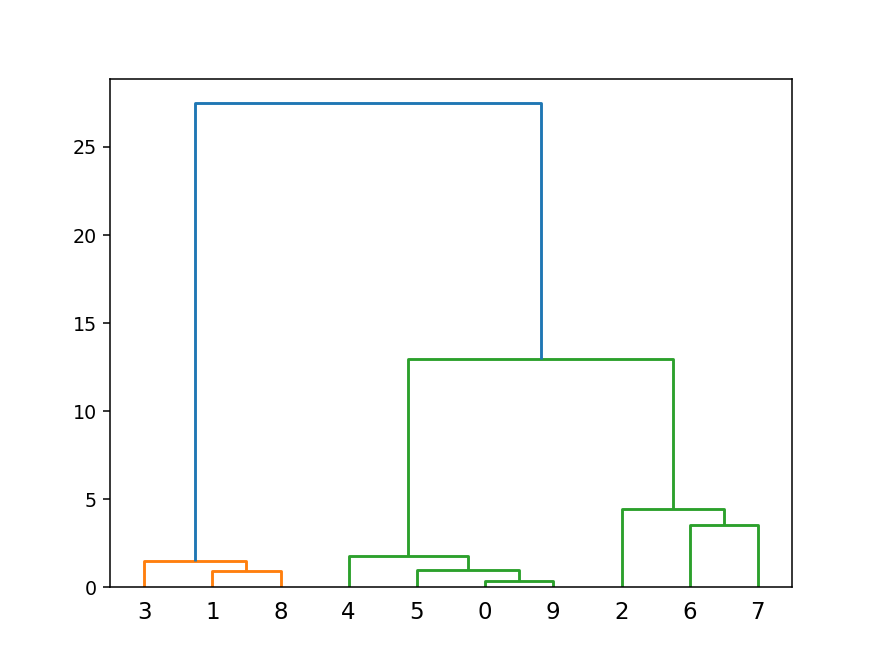

In [47]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

### DBSCAN clustering de pruebas

Cluster membership values:
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


<IPython.core.display.Javascript object>


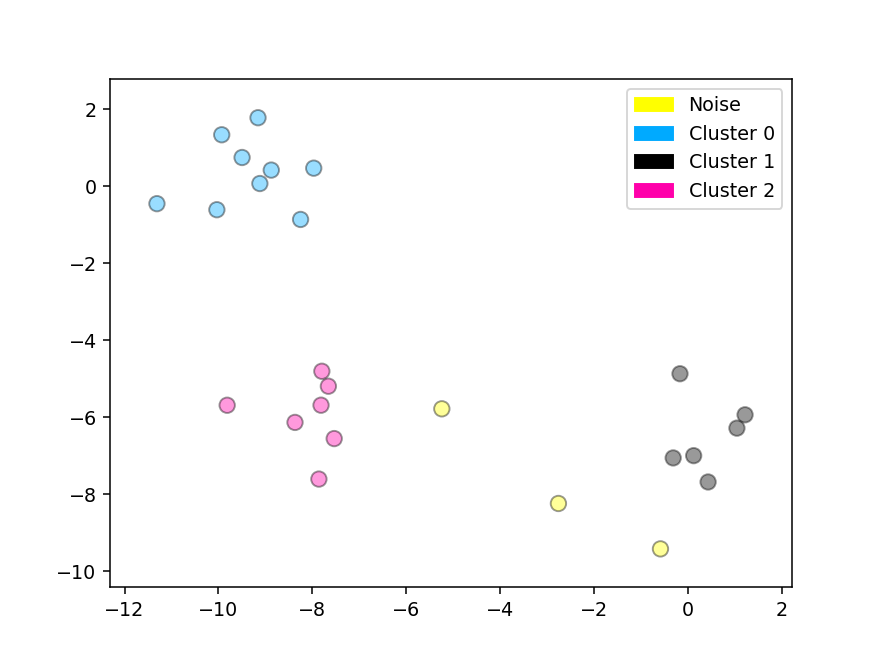

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 25)


dbscan = DBSCAN(eps = 2, min_samples = 2)

cls = dbscan.fit_predict(X)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])

## Dbscan de dataset de Frutas

In [70]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

fruits = pd.read_table('fruit_data_with_colors.txt')
X_db = fruits[['mass','width','height', 'color_score']]
y_db = fruits[['fruit_label']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# cada característica debe estar centrada (media cero) y con varianza unitaria
#X_fruits_normaliz = StandardScaler().fit(X).transform(X)  
X_fruits_normaliz = MinMaxScaler().fit(X).transform(X)  

dbscan = DBSCAN(eps = 2, min_samples = 2)
cls = dbscan.fit(X_fruits_normaliz)
print("Cluster membership values:\n{}".format(cls))

Cluster membership values:
DBSCAN(eps=2, min_samples=2)


In [77]:
#Predicciones y es mu parceido a resualtdos de kmeans.labels_
y_predb = dbscan.fit_predict(X_db)

<IPython.core.display.Javascript object>


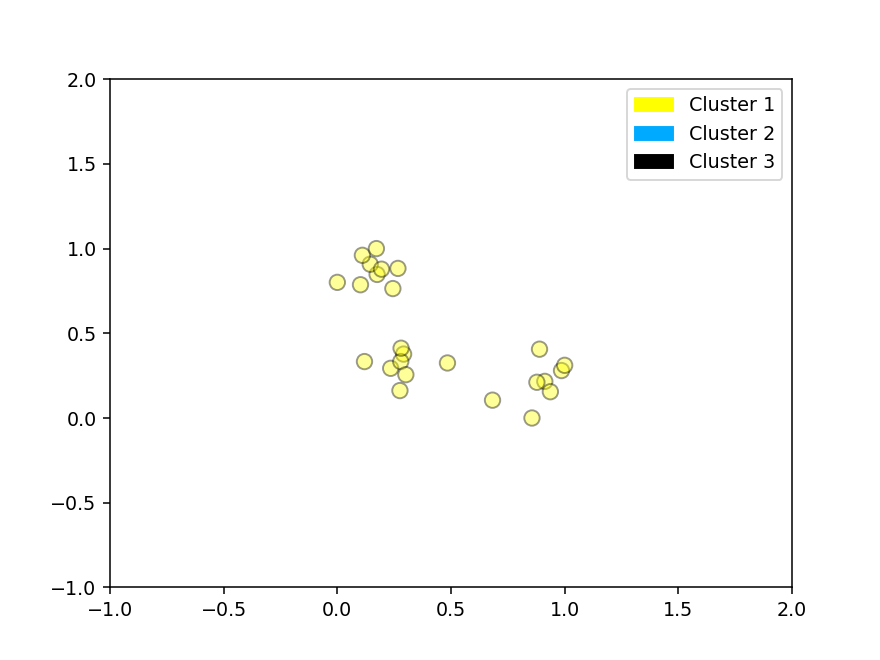

In [72]:
plot_labelled_scatter(X_fruits_normaliz, y_predb, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

In [78]:
def dbscan_fn(X_fruits_normalized, eps=0.45, min_samples=4):
    model = DBSCAN(eps=eps, min_samples=min_samples).fit(X_db)
    return model

In [79]:
# Calculamos el purity score, es importante darse cuenta de que recibe las etiquetas
# no es bueno para evaluarv data desequilbrada hay muchos datos puros.Una sola pasada.
print("Purity Score:", purity_score(y_db, y_predb))

Purity Score: 0.5932203389830508


In [80]:
build_model(dbscan_fn, X_db, y_predb)

homo	compl	v-meas	ARI	AMI
--------------------------------------------------
0.120	1.000	0.215	0.080	0.156


In [ ]:
# ESTAS FORMA ES PARA REVISAR LUEGO MUY VACANAS...................................................

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)<
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))